# **Description:**

## **Abstract:**
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## **Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## **Attribute Information:**
**Bank client data:**  
`0.` Age (numeric)  
`1.` Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')  
`2.` Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)  
`3.` Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')  
`4.` Default: has credit in default? (categorical: 'no', 'yes', 'unknown')  
`5.` Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')  
`6.` Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')  
**Related with the last contact of the current campaign:**  
`7.` Contact: contact communication type (categorical:
'cellular','telephone')  
`8.` Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')  
`9.` Dayofweek: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')  
`10.` Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.  
**Other attributes:**  
`11.` Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)  
`12.` Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)  
`13.` Previous: number of contacts performed before this campaign and for
this client (numeric)  
`14.` Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')  
**Social and economic context attributes:**  
`15.` Emp.var.rate: employment variation rate - quarterly indicator
(numeric)  
`16.` Cons.price.idx: consumer price index - monthly indicator (numeric)  
`17.` Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)  
`18.` Euribor3m: euribor 3 month rate - daily indicator (numeric)  
`19.` Nr.employed: number of employees - quarterly indicator (numeric)  
**Output variable (desired target):**  
`20.` y - has the client subscribed a term deposit? (binary: 'yes', 'no')  
## **Analysis Steps:**  
`1.` Atribute information Analysis.  
`2.` Machine Learning (Logistic Regression, KNN, SVM, Decision Tree,
Random Forest, Naive Bayes)  
`3.` Deep Learning (ANN)  
## **Source:**
*Dataset from :* http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from scipy import stats

# Load and describe data:

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/PBL/Data/bank-additional-full.csv'
df = pd.read_csv(path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

`unknown` được hiểu nhầm không phải NaN -> nhầm tưởng dữ liệu đầy đủ.

In [ ]:
# Numerical data:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# categorical data:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
# df.replace('unknown', np.nan, inplace=True) # thay thế 'unknown' thành NaN
# df.info()

In [ ]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.isna())
# plt.show()

In [ ]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}~{:.2f}%".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)        

# EDA:

## Bank client data:

### 1. Age:

In [ ]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Range: 17-98 



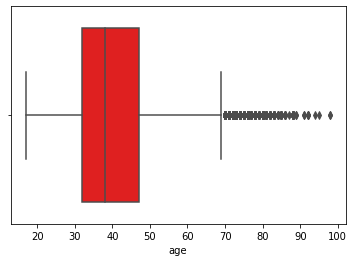

In [ ]:
print('Range: %d-%d \n' % (df['age'].min(), df['age'].max()))
sns.boxplot(df['age'], color='red')
plt.show()

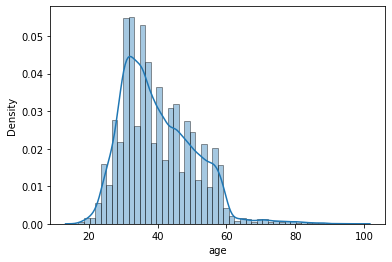

In [ ]:
sns.distplot(df['age'], hist=True, hist_kws = {'edgecolor':'black'})
plt.show()

`1` Độ tuổi khách hàng từ $[17; 98]$ nhưng tập trung chủ yếu trong khoảng $[20; 70]$. Chiếm tỉ trọng cao nhất ở khoảng $[32; 47]$.  
`2` Biểu đồ lệch phải.  
`3` Có nhiều outliers nhưng lại nằm trong khoảng chấp nhận được -> dữ liệu tin tưởng được.

### 2. Job:

Unknown:  330


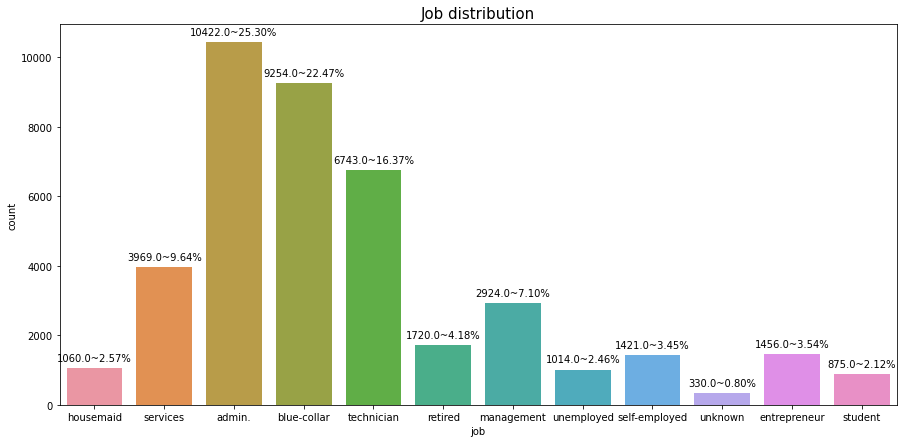

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x='job', ax=ax)
ax.set_title('Job distribution', fontsize=15)
label_values(ax)
# print('Count NaN: ', df['job'].isna().sum())
print('Unknown: ', df[df['job']=='unknown'].shape[0])
plt.show()

`1` Các công việc chủ yếu: **admin, blue-collar, technician, services, management**  
`2` Unknown: 330 -> ít.

### 3. Marital:

Unknown:  80


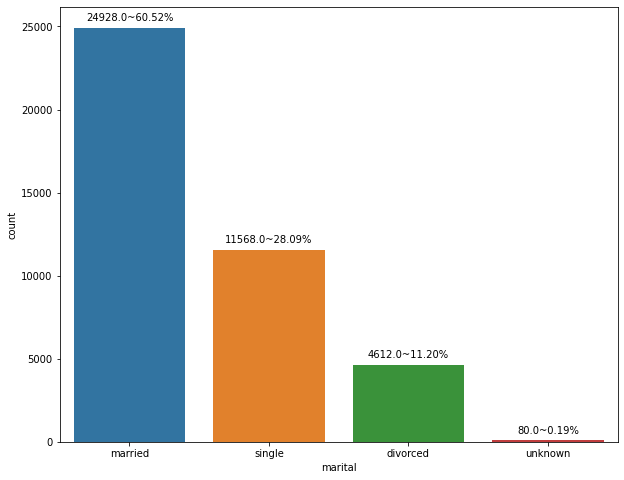

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data=df, x='marital')
label_values(ax)
# print('Count NaN: ', df['marital'].isna().sum())
print('Unknown: ', df[df['marital']=='unknown'].shape[0])
plt.show()

In [ ]:
df[['marital']].describe()

,marital
count,41188
unique,4
top,married
freq,24928


`1` Chủ yếu khách hàng đang trong tình trạng đã kết hôn (24928~60.5%).  
`2` Missing: 80 -> ít.

### 4. Education:

In [ ]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

Unknown:  1731


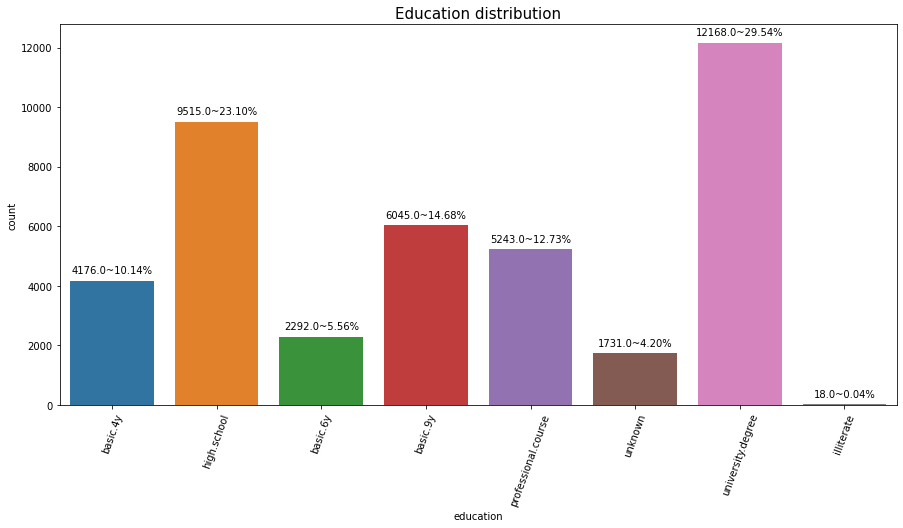

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x='education', ax=ax)
ax.set_title('Education distribution', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize=10)
label_values(ax)
# print('Count NaN: ', df['education'].isna().sum())
print('Unknown: ', df[df['education']=='unknown'].shape[0])
plt.show()

`1` Các bậc chủ yếu: **high.school, university.degree, basic.9y, professional.course**  
`2` Tỉ lệ **illiterate** rất thấp.  
`3` Missing: 1731 -> ít.

### 4. Default, housing and loan:

Unknown default:  8597
Unknown housing:  990
Unknown loan:  990


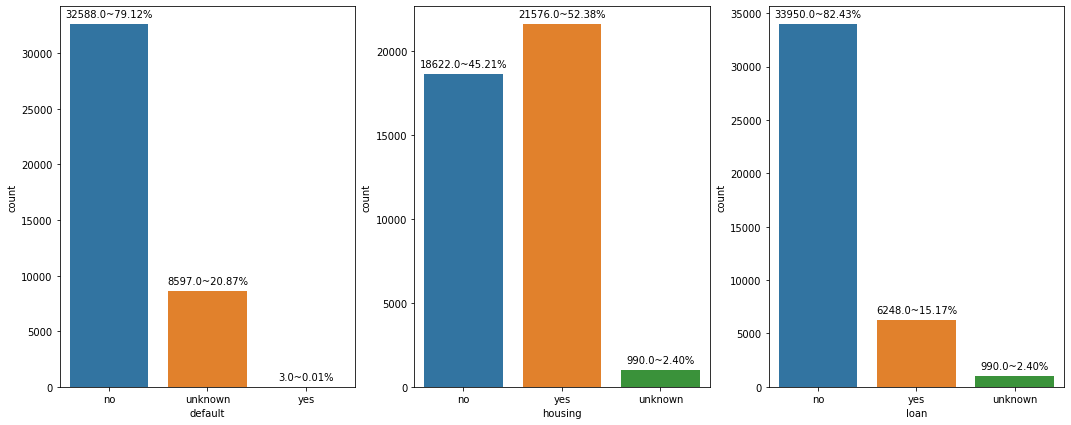

In [ ]:
plt.figure(figsize=(18, 7))

print('Unknown default: ', df[df['default']=='unknown'].shape[0])
print('Unknown housing: ', df[df['housing']=='unknown'].shape[0])
print('Unknown loan: ', df[df['loan']=='unknown'].shape[0])

plt.subplot(1, 3, 1)
ax=sns.countplot(data=df, x='default')
label_values(ax)

plt.subplot(1, 3, 2)
ax=sns.countplot(data=df, x='housing')
label_values(ax)

plt.subplot(1, 3, 3)
ax=sns.countplot(data=df, x='loan')
label_values(ax)

plt.show()

**Default:**  
`1` Tỉ lệ lớn không vỡ nợ -> Tỉ lệ sẽ được gọi cao hơn.  
`2` Có 3 người vỡ nợ -> Tỉ lệ sẽ được gọi thấp.  
`3` Missing: 8597~20.9% 

**Housing:**  
`1` Tỉ lệ đã có hoặc không khoản vay để mua nhà không chênh lệch nhiều.  
`2` Missing: 990

**Loan:**  
`1` Tỉ lệ lớn chưa có khoản vay cá nhân -> tỉ lệ tin cậy cao hơn.  
`2` Missing: 990

## Related with the last contact of the current campaign:

### 1. Contact:

In [ ]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

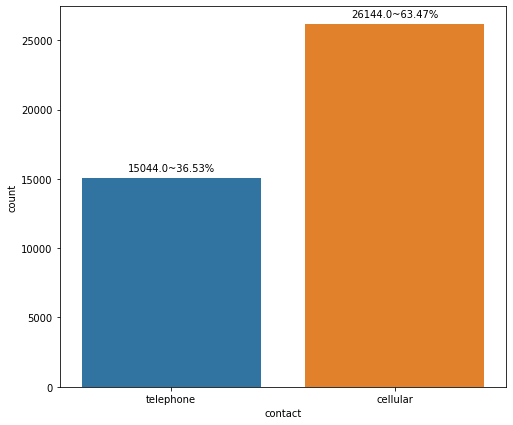

In [ ]:
plt.figure(figsize=(8, 7))
ax=sns.countplot(data=df, x='contact')
label_values(ax)
plt.show()

Tỉ lệ sử dụng di động cao hơn.

### 2. Month, Dayofweek:

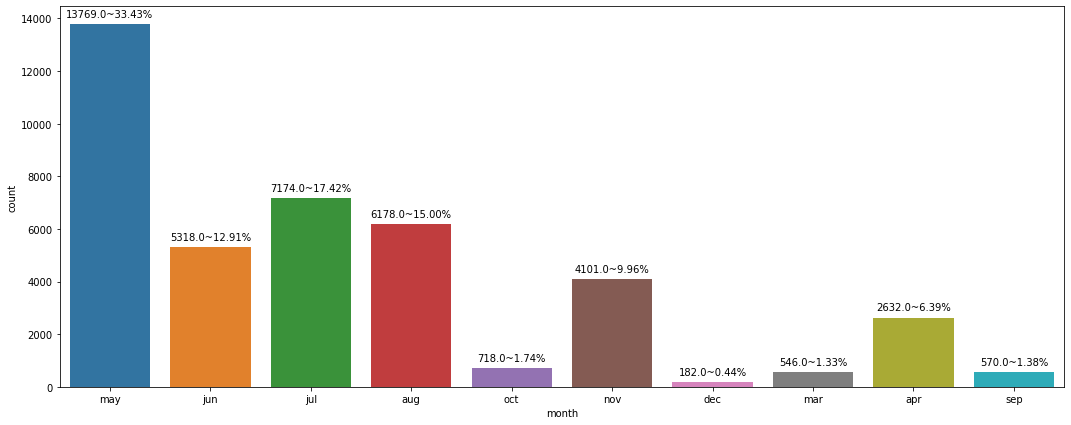

In [ ]:
plt.figure(figsize=(18, 7))
ax=sns.countplot(data=df, x='month')
label_values(ax)

plt.show()

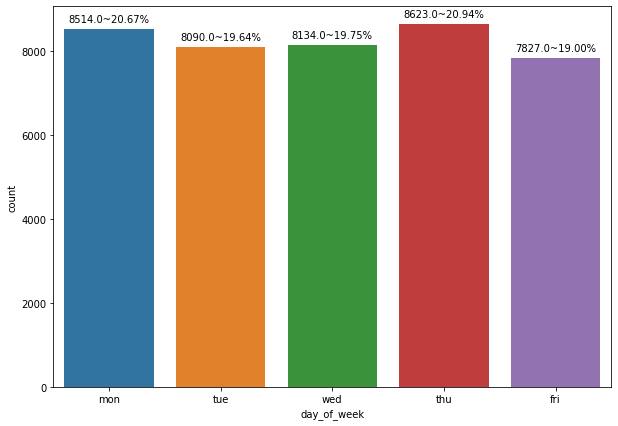

In [ ]:
plt.figure(figsize=(10, 7))
ax=sns.countplot(data=df, x='day_of_week')
label_values(ax)

plt.show()

`1.` Các tháng ít liên hệ: 3, 9, 10, 12.  
`2.` Các ngày làm việc trong tuần đều có lượng liên hệ không có nhiều khác biệt.

### 3. Duration:  
*Chỉ phân tích, không có ý nghĩa cho mô hình dự đoán. Vì thời lượng cuộc gọi không được biết trước, một khi cuộc gọi kết thúc thì ta đã biết chắc chắn kết quả **"yes"** hoặc **"no"** rồi.*

In [ ]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Range: 0-4918
Mean:  258.29
Standard deviation:  259.28


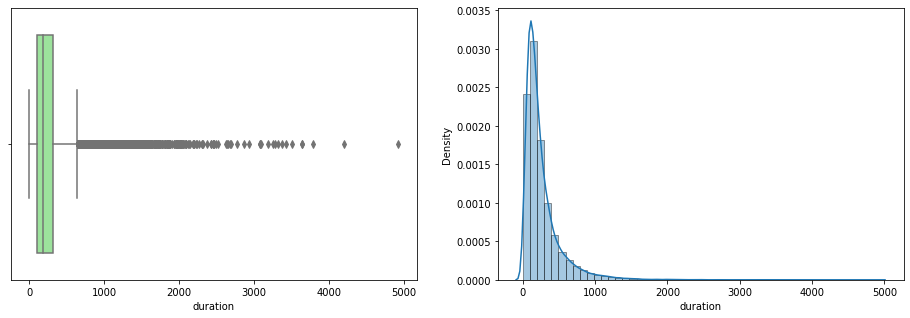

In [ ]:
print('Range: %d-%d' % (df['duration'].min(), df['duration'].max()))
print('Mean: ', round(df['duration'].describe().loc['mean'], 2))
print('Standard deviation: ', round(df['duration'].describe().loc['std'], 2))

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df['duration'], color='lightgreen')

plt.subplot(1, 2, 2)
sns.distplot(df['duration'], hist=True, hist_kws = {'edgecolor':'black'})
plt.show()

`1.` Hầu hết thời gian cuộc gọi đều nằm xoay quanh mức Median.  
`2.` Suy ra thời gian gọi trong các khoảng quartile sẽ cho hiệu suất tốt hơn.

In [ ]:
IQR = df['duration'].describe().loc['75%'] - df['duration'].describe().loc['25%']
print("First quartile: ", df['duration'].describe().loc['25%'])
print("Second quartile: ", df['duration'].describe().loc['50%'])
print("Third quartile: ", df['duration'].describe().loc['75%'])
print("Inter quartile range: ", IQR)
print("Duration outliers: ", df['duration'].describe().loc['75%'] + 1.5*IQR)

First quartile:  102.0
Second quartile:  180.0
Third quartile:  319.0
Inter quartile range:  217.0
Duration outliers:  644.5


In [ ]:
print("Number of outliers: %d ~ %.2f%%" % (df[df['duration'] > 644.5]['duration'].count(), 
df[df['duration'] > 644.5]['duration'].count()/41188*100) )

Number of outliers: 2963 ~ 7.19%


## Social and economic context attributes:

### 1. Emp.var.rate:

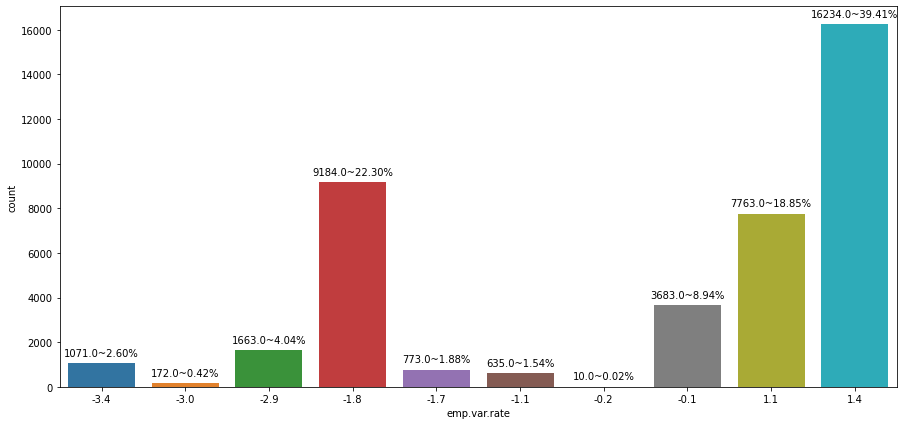

In [ ]:
plt.figure(figsize=(15, 7))
ax=sns.countplot(data=df, x='emp.var.rate')
label_values(ax)
plt.show()

### 2. Cons.price.idx, Cons.conf.idx:

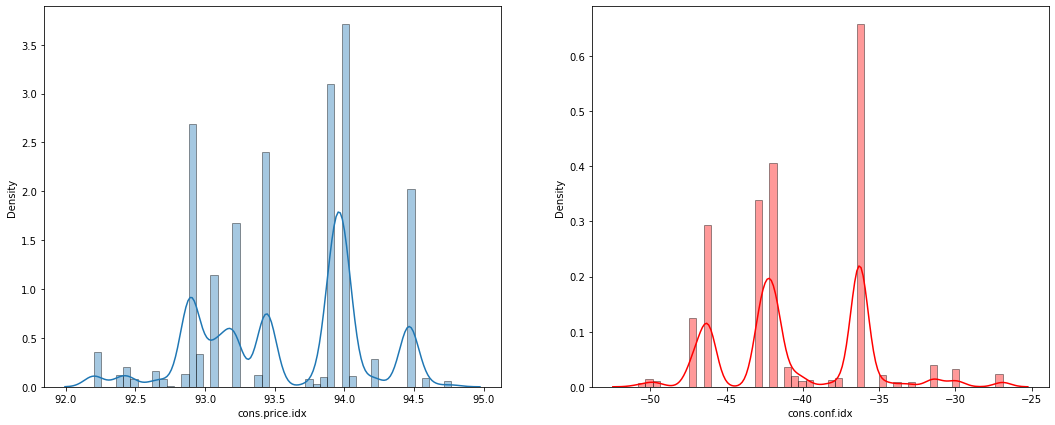

In [ ]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
sns.distplot(df['cons.price.idx'], hist=True, hist_kws = {'edgecolor':'black'})

plt.subplot(1, 2, 2)
sns.distplot(df['cons.conf.idx'], hist=True, hist_kws = {'edgecolor':'black'}, color='red')

plt.show()

### 3. Euribor3m:

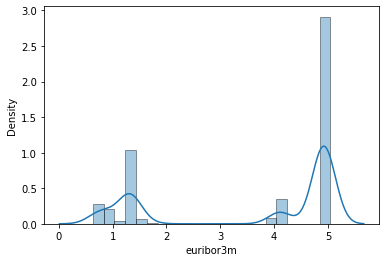

In [ ]:
sns.distplot(df['euribor3m'], hist=True, hist_kws = {'edgecolor':'black'})
plt.show()

### 4. Nr.employed:

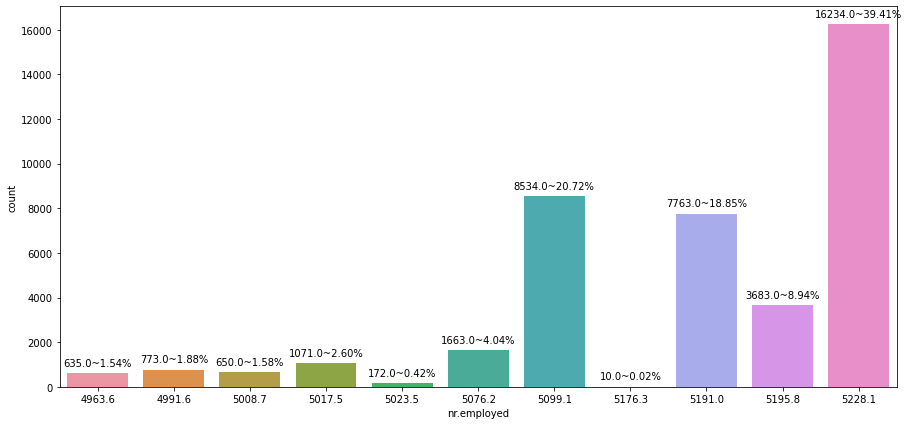

In [ ]:
plt.figure(figsize=(15, 7))
ax=sns.countplot(data=df, x='nr.employed')
label_values(ax)
plt.show()

## Other attributes:

### 1. Campaign:  
*Chỉ dùng phân tích, không dùng cho mô hình dự đoán. Vì số lần liên lạc không được biết trước.*

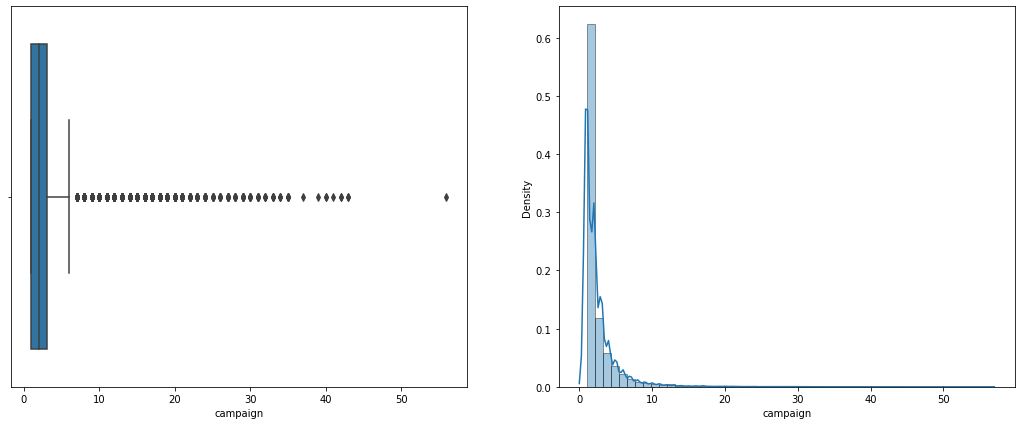

In [ ]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='campaign')

plt.subplot(1, 2, 2)
sns.distplot(df['campaign'], hist=True, hist_kws = {'edgecolor':'black'})

plt.show()

### 2. Pdays:

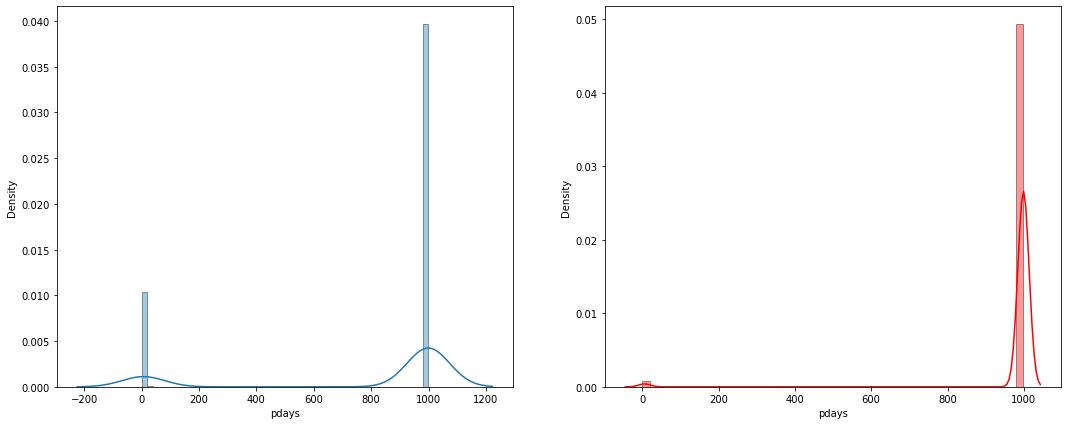

In [ ]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
sns.distplot(df[df['y']=='yes']['pdays'], hist=True, hist_kws = {'edgecolor':'black'})

plt.subplot(1, 2, 2)
sns.distplot(df[df['y']=='no']['pdays'], hist=True, hist_kws = {'edgecolor':'black'}, color='red')

plt.show()

`1.` Tỉ lệ "yes" sau 0 ngày liên lạc cao hơn rất nhiều so với "no".  
`2.` **999** là khách hàng chưa được liên hệ trước đây.

### 3. Previous:

In [ ]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

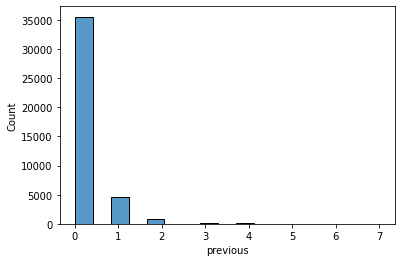

In [ ]:
sns.histplot(df['previous'])

### 4. Poutcome:

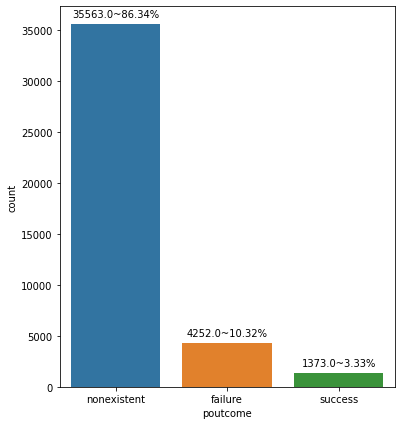

In [ ]:
plt.figure(figsize=(6, 7))
ax=sns.countplot(data=df, x='poutcome')
label_values(ax)
plt.show()

# Categorical treatment:

## 1. Bank client data:

In [ ]:
df_bcd = df.iloc[: , 0:7]
df_bcd.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [ ]:
def age_group(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70), 'age'] = 4
           
    return dataframe

In [ ]:
age_group(df_bcd)
df_bcd.head()

,age,job,marital,education,default,housing,loan
0,3,housemaid,married,basic.4y,no,no,no
1,3,services,married,high.school,unknown,no,no
2,2,services,married,high.school,no,yes,no
3,2,admin.,married,basic.6y,no,no,no
4,3,services,married,high.school,no,no,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder # Encode theo thứ tự chữ cái.
LE = LabelEncoder()

In [ ]:
df_bcd['job'] = LE.fit_transform(df_bcd['job']) 
df_bcd['marital'] = LE.fit_transform(df_bcd['marital']) 
df_bcd['education'] = LE.fit_transform(df_bcd['education']) 
df_bcd['default'] = LE.fit_transform(df_bcd['default']) 
df_bcd['housing'] = LE.fit_transform(df_bcd['housing']) 
df_bcd['loan'] = LE.fit_transform(df_bcd['loan']) 

df_bcd.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


## 2. Related with the last contact of the current campaign:

In [ ]:
df_related = df.iloc[: , 7:10] # bỏ duration
df_related.head()

,contact,month,day_of_week
0,telephone,may,mon
1,telephone,may,mon
2,telephone,may,mon
3,telephone,may,mon
4,telephone,may,mon


In [ ]:
print(df_related['month'].unique())
print(df_related['day_of_week'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


In [ ]:
df_related['contact'] = LE.fit_transform(df_related['contact'])

map_month = {'may': 5,'jun': 6,'jul': 7,'aug': 8,'oct': 10,'nov': 11,'dec': 12, 'mar': 3,'apr': 4,'sep': 9}
df_related['month'] = df_related['month'].map(map_month)

map_day = {'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6}
df_related['day_of_week'] = df_related['day_of_week'].map(map_day)


df_related.head()

,contact,month,day_of_week
0,1,5,2
1,1,5,2
2,1,5,2
3,1,5,2
4,1,5,2


## 3. Other attributes:

In [ ]:
df_o = df.iloc[: , 12:15] # bỏ campaign
df_o.head()

,pdays,previous,poutcome
0,999,0,nonexistent
1,999,0,nonexistent
2,999,0,nonexistent
3,999,0,nonexistent
4,999,0,nonexistent


In [ ]:
df_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
map_poutcome = {'nonexistent': 1, 'failure': 2, 'success': 3}
df_o['poutcome'] = df_o['poutcome'].map(map_poutcome)
df_o.head()

,pdays,previous,poutcome
0,999,0,1
1,999,0,1
2,999,0,1
3,999,0,1
4,999,0,1


## Social and economic context attributes:

In [ ]:
df_SE = df.iloc[: , 15:20]
df_SE.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# Model:

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
Sk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X= pd.concat([df_bcd, df_related, df_SE, df_o], axis = 1)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,5,2,1.1,93.994,-36.4,4.857,5191.0,999,0,1
1,3,7,1,3,1,0,0,1,5,2,1.1,93.994,-36.4,4.857,5191.0,999,0,1
2,2,7,1,3,0,2,0,1,5,2,1.1,93.994,-36.4,4.857,5191.0,999,0,1
3,2,0,1,1,0,0,0,1,5,2,1.1,93.994,-36.4,4.857,5191.0,999,0,1
4,3,7,1,3,0,0,2,1,5,2,1.1,93.994,-36.4,4.857,5191.0,999,0,1


In [ ]:
map_y = {'yes':0, 'no':1}
y = df['y']
y = y.map(map_y)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [ ]:
y.value_counts()

1    36548
0     4640
Name: y, dtype: int64

`1.` "No" cao hơn "Yes" rất nhiều.  
`2.` "Yes" - **Positive** , "No" - **Negative**.

## 1. Split and Scale dataset:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 2. Logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
scores = cross_val_score(logmodel, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
LGCV = scores.mean()

print(confusion_matrix(y_test, logpred))
print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, logpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

[[ 195  764]
 [  81 7198]]
Accuracy testset: 90.00
Avg accuracy: 90.03 (+/- 0.30)


## 3. KNN:

k=1, avg acuracy: 84.97 (+/- 0.57)
k=2, avg acuracy: 80.79 (+/- 0.47)
k=3, avg acuracy: 88.51 (+/- 0.45)
k=4, avg acuracy: 87.58 (+/- 0.51)
k=5, avg acuracy: 89.20 (+/- 0.30)
k=6, avg acuracy: 88.78 (+/- 0.37)
k=7, avg acuracy: 89.41 (+/- 0.34)
k=8, avg acuracy: 89.23 (+/- 0.39)
k=9, avg acuracy: 89.70 (+/- 0.39)
k=10, avg acuracy: 89.44 (+/- 0.38)
k=11, avg acuracy: 89.69 (+/- 0.41)
k=12, avg acuracy: 89.49 (+/- 0.40)
k=13, avg acuracy: 89.76 (+/- 0.45)
k=14, avg acuracy: 89.54 (+/- 0.50)
k=15, avg acuracy: 89.77 (+/- 0.52)
k=16, avg acuracy: 89.68 (+/- 0.55)
k=17, avg acuracy: 89.78 (+/- 0.44)
k=18, avg acuracy: 89.71 (+/- 0.49)
k=19, avg acuracy: 89.71 (+/- 0.45)
k=20, avg acuracy: 89.63 (+/- 0.45)
k=21, avg acuracy: 89.75 (+/- 0.40)
k=22, avg acuracy: 89.72 (+/- 0.42)
k=23, avg acuracy: 89.75 (+/- 0.39)
k=24, avg acuracy: 89.67 (+/- 0.39)
k=25, avg acuracy: 89.73 (+/- 0.35)
The optimal number of neighbors is 17 with 89.78%


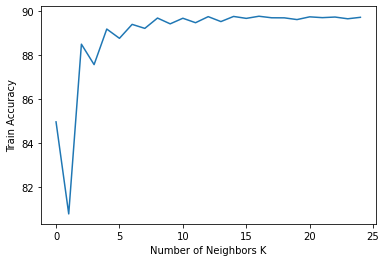

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, test_size = 0.2, random_state = 42)

neighbors = np.arange(0,25)

cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    Skfold = StratifiedKFold(n_splits=10, random_state=123)
    scores = cross_val_score(knn, X_trainK, y_trainK, cv=Skfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d, avg scores: %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores)) + 1]
print ("The optimal number of neighbors is %d with %0.2f%%" % (optimal_k, cv_scores[optimal_k - 1]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
scores = cross_val_score(knn, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
KNNCV = scores.mean()

print(confusion_matrix(y_test, knnpred))
print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, knnpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

[[ 235  724]
 [ 131 7148]]
Accuracy testset: 90.00
Avg accuracy: 89.86 (+/- 0.31)


## 4. Decision tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
scores = cross_val_score(dtree, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
DTCV = scores.mean()

print(confusion_matrix(y_test, dtreepred))
print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, dtreepred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

[[ 322  637]
 [ 700 6579]]
Accuracy testset: 84.00
Avg accuracy: 84.03 (+/- 0.79)


## 5. Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
scores = cross_val_score(rfc, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
RFCV = scores.mean()

print(confusion_matrix(y_test, rfcpred ))
print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, rfcpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

[[ 292  667]
 [ 285 6994]]
Accuracy testset: 88.00
Avg accuracy: 88.70 (+/- 0.47)


## 6. Naive bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)
scores = cross_val_score(gaussiannb, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
GNBCV = scores.mean()

print(confusion_matrix(y_test, gaussiannbpred ))
print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, gaussiannbpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

[[ 448  511]
 [ 790 6489]]
Accuracy testset: 84.00
Avg accuracy: 83.81 (+/- 0.71)


## 7. XGBoost:

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
scores = cross_val_score(xgb, X_train, y_train, cv = Sk_fold, n_jobs=1, scoring = 'accuracy')
XGBCV = scores.mean()

print(confusion_matrix(y_test, xgbprd ))
print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, xgbprd),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

[[ 216  743]
 [  92 7187]]
Accuracy testset: 90.00
Avg accuracy: 90.12 (+/- 0.27)


## 8. Gradient boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
scores = cross_val_score(gbk, X_train, y_train, cv=Sk_fold, n_jobs=1, scoring = 'accuracy')
GBCV = scores.mean()

print(confusion_matrix(y_test, gbkpred ))
print('Accuracy testset: %0.2f' % (round(accuracy_score(y_test, gbkpred),2)*100))
print('Avg scores: %0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

[[ 217  742]
 [ 100 7179]]
Accuracy testset: 90.00
Avg accuracy: 90.14 (+/- 0.30)


## 9. Score of models:

In [ ]:
models = pd.DataFrame({
    'Models':['Logistic regression', 'KNN', 'Decision tree', 'Random forest', 'Naive bayes', 'XGBoost', 'Gradient boosting'],
    'Score':[LGCV, KNNCV, DTCV, RFCV, GNBCV, XGBCV, GBCV]
})

models.sort_values(by='Score', ascending=False)

,Models,Score
6,Gradient boosting,90.136571
5,XGBoost,90.121396
0,Logistic regression,90.027314
1,KNN,89.863429
3,Random forest,88.701062
2,Decision tree,84.033384
4,Naive bayes,83.808801


# Analyzing the results:

`1.` **False Positive Rate** (*tỉ lệ nhầm*): tỉ lệ khách hàng không đăng kí nhưng model lại dự đoán là có.  
`2.` **False Negative Rate** (*tỉ lệ bỏ sót*): tỉ lệ khách hàng đăng kí nhưng model lại dự đoán là không.  

## Receiver operating characteristic curve (ROC curve) và Area under the curve (AUC):

In [ ]:
from sklearn import metrics

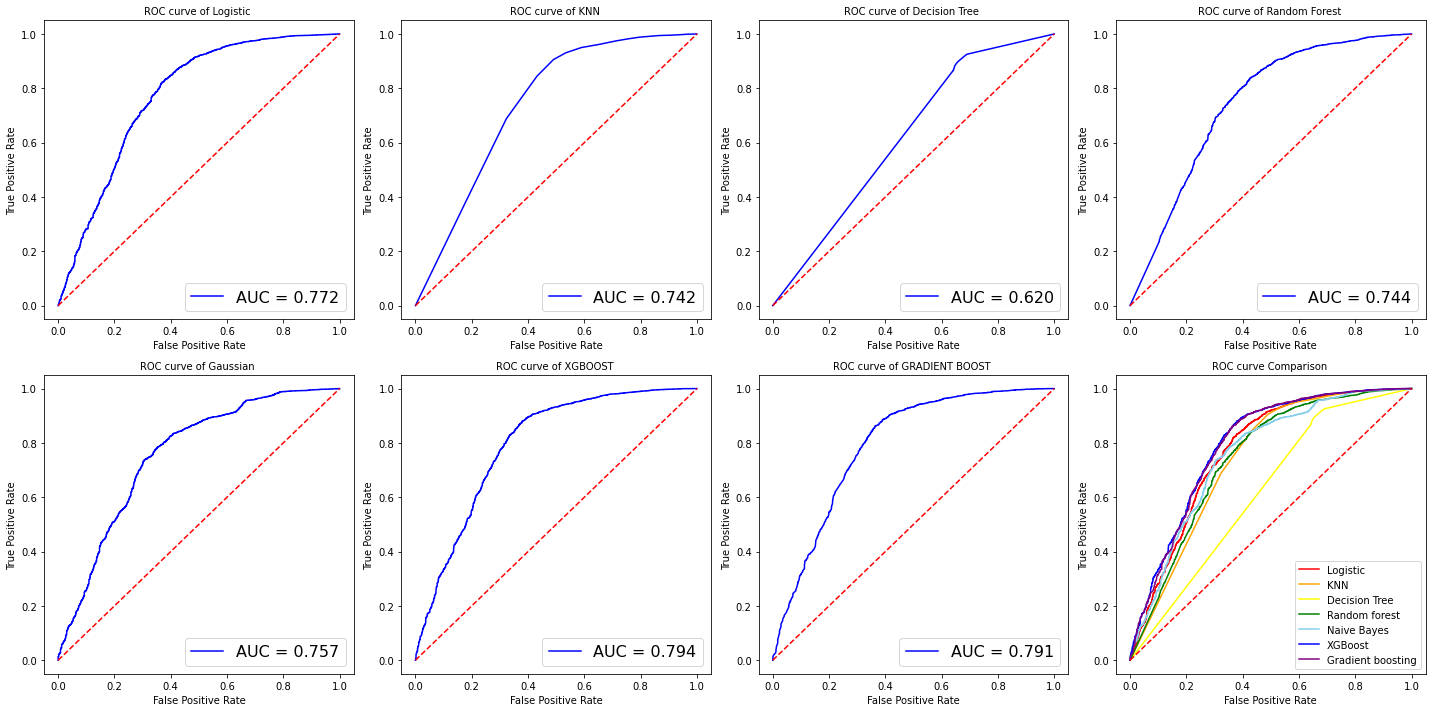

In [ ]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.3f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC curve of Logistic ',fontsize=10)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.3f' % roc_aucknn)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC curve of KNN ',fontsize=10)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,2].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.3f' % roc_aucdtree)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('ROC curve of Decision Tree ',fontsize=10)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,3].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.3f' % roc_aucrfc)
ax_arr[0,3].plot([0, 1], [0, 1],'r--')
ax_arr[0,3].set_title('ROC curve of Random Forest ',fontsize=10)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,3].legend(loc = 'lower right', prop={'size': 16})


#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,0].plot(fprgau, tprgau, 'b', label = 'AUC = %0.3f' % roc_aucgau)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC curve of Gaussian ',fontsize=10)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#XGBOOST
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[1,1].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.3f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC curve of XGBOOST ',fontsize=10)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax_arr[1,2].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.3f' % roc_aucgbk)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('ROC curve of GRADIENT BOOST ',fontsize=10)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,3].plot(fprlog, tprlog, 'b', label = 'Logistic', color='red')
ax_arr[1,3].plot(fprknn, tprknn, 'b', label = 'KNN', color='orange')
ax_arr[1,3].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='yellow')
ax_arr[1,3].plot(fprrfc, tprrfc, 'b', label = 'Random forest', color='green')
ax_arr[1,3].plot(fprgau, tprgau, 'b', label = 'Naive Bayes', color='skyblue')
ax_arr[1,3].plot(fprxgb, tprxgb, 'b', label = 'XGBoost', color='blue')
ax_arr[1,3].plot(fprgbk, tprgbk, 'b', label = 'Gradient boosting', color='purple')
ax_arr[1,3].plot([0, 1], [0, 1],'r--')
ax_arr[1,3].set_title('ROC curve Comparison ',fontsize=10)
ax_arr[1,3].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,3].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,3].legend(loc = 'lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

-> Dựa vào AUC thì mô hình XGBoost đem lại hiệu quả cao nhất.

##**KẾT LUẬN:**  
- Chấp nhận việc để FPR cao hơn và FNR thấp hơn vì chi phí cho việc marketing nhầm ít hơn rất nhiều so với việc mất đi khoản lợi nhuận có thể có từ nhóm khách hàng tiềm năng. 
- Vì vậy cần tìm ra mô hình tốt nhất với confusion matrix có FNR thấp nhất.  
- Tỉ lệ chênh lệch giữa "Yes" và "No" cao nên sẽ sử dụng **Precision** và **Recall**.